In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv(r"D:\Data Analysis_Bootcamp\Kaggle_Datasets\Egypt_Houses_Price.csv")
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


In [142]:
df['Bathrooms'] = df['Bathrooms'].str.replace('Unknown', '0')
df['Bathrooms'] = df['Bathrooms'].str.replace('+', '')
df['Price'] = df['Price'].str.replace('Unknown', '0')
df['Area'] = df['Area'].str.replace('Unknown', '0')
df['Bedrooms'] = df['Bedrooms'].str.replace('Unknown', '0')
df['Bedrooms'] = df['Bedrooms'].str.replace('+', '')
df['Type'] = df['Type'].str.replace('Standalone Villa', 'Stand Alone Villa')
df['Type'] = df['Type'].str.replace('Standalone Villa', 'Stand Alone Villa')

In [143]:
df['Price'] = df['Price'].astype(float)
df['Area'] = df['Area'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(float)
df['Bedrooms'] = df['Bedrooms'].astype(float)
df['Type'] = df['Type'].astype("category")

In [144]:
city_grouped = df.groupby("City")[['Price']].mean().reset_index()
print(city_grouped)

                    City         Price
0    (View phone number)  9.971262e+06
1        10th of Ramadan  2.729264e+06
2            15 May City  2.413077e+06
3         6th of October  4.249517e+06
4                Abasiya  1.180000e+06
..                   ...           ...
178      Zahraa Al Maadi  1.809672e+06
179              Zamalek  5.683424e+06
180       Zawya al-Hamra  6.100000e+05
181              Zezenia  4.116923e+06
182      Zohour District  3.032400e+05

[183 rows x 2 columns]


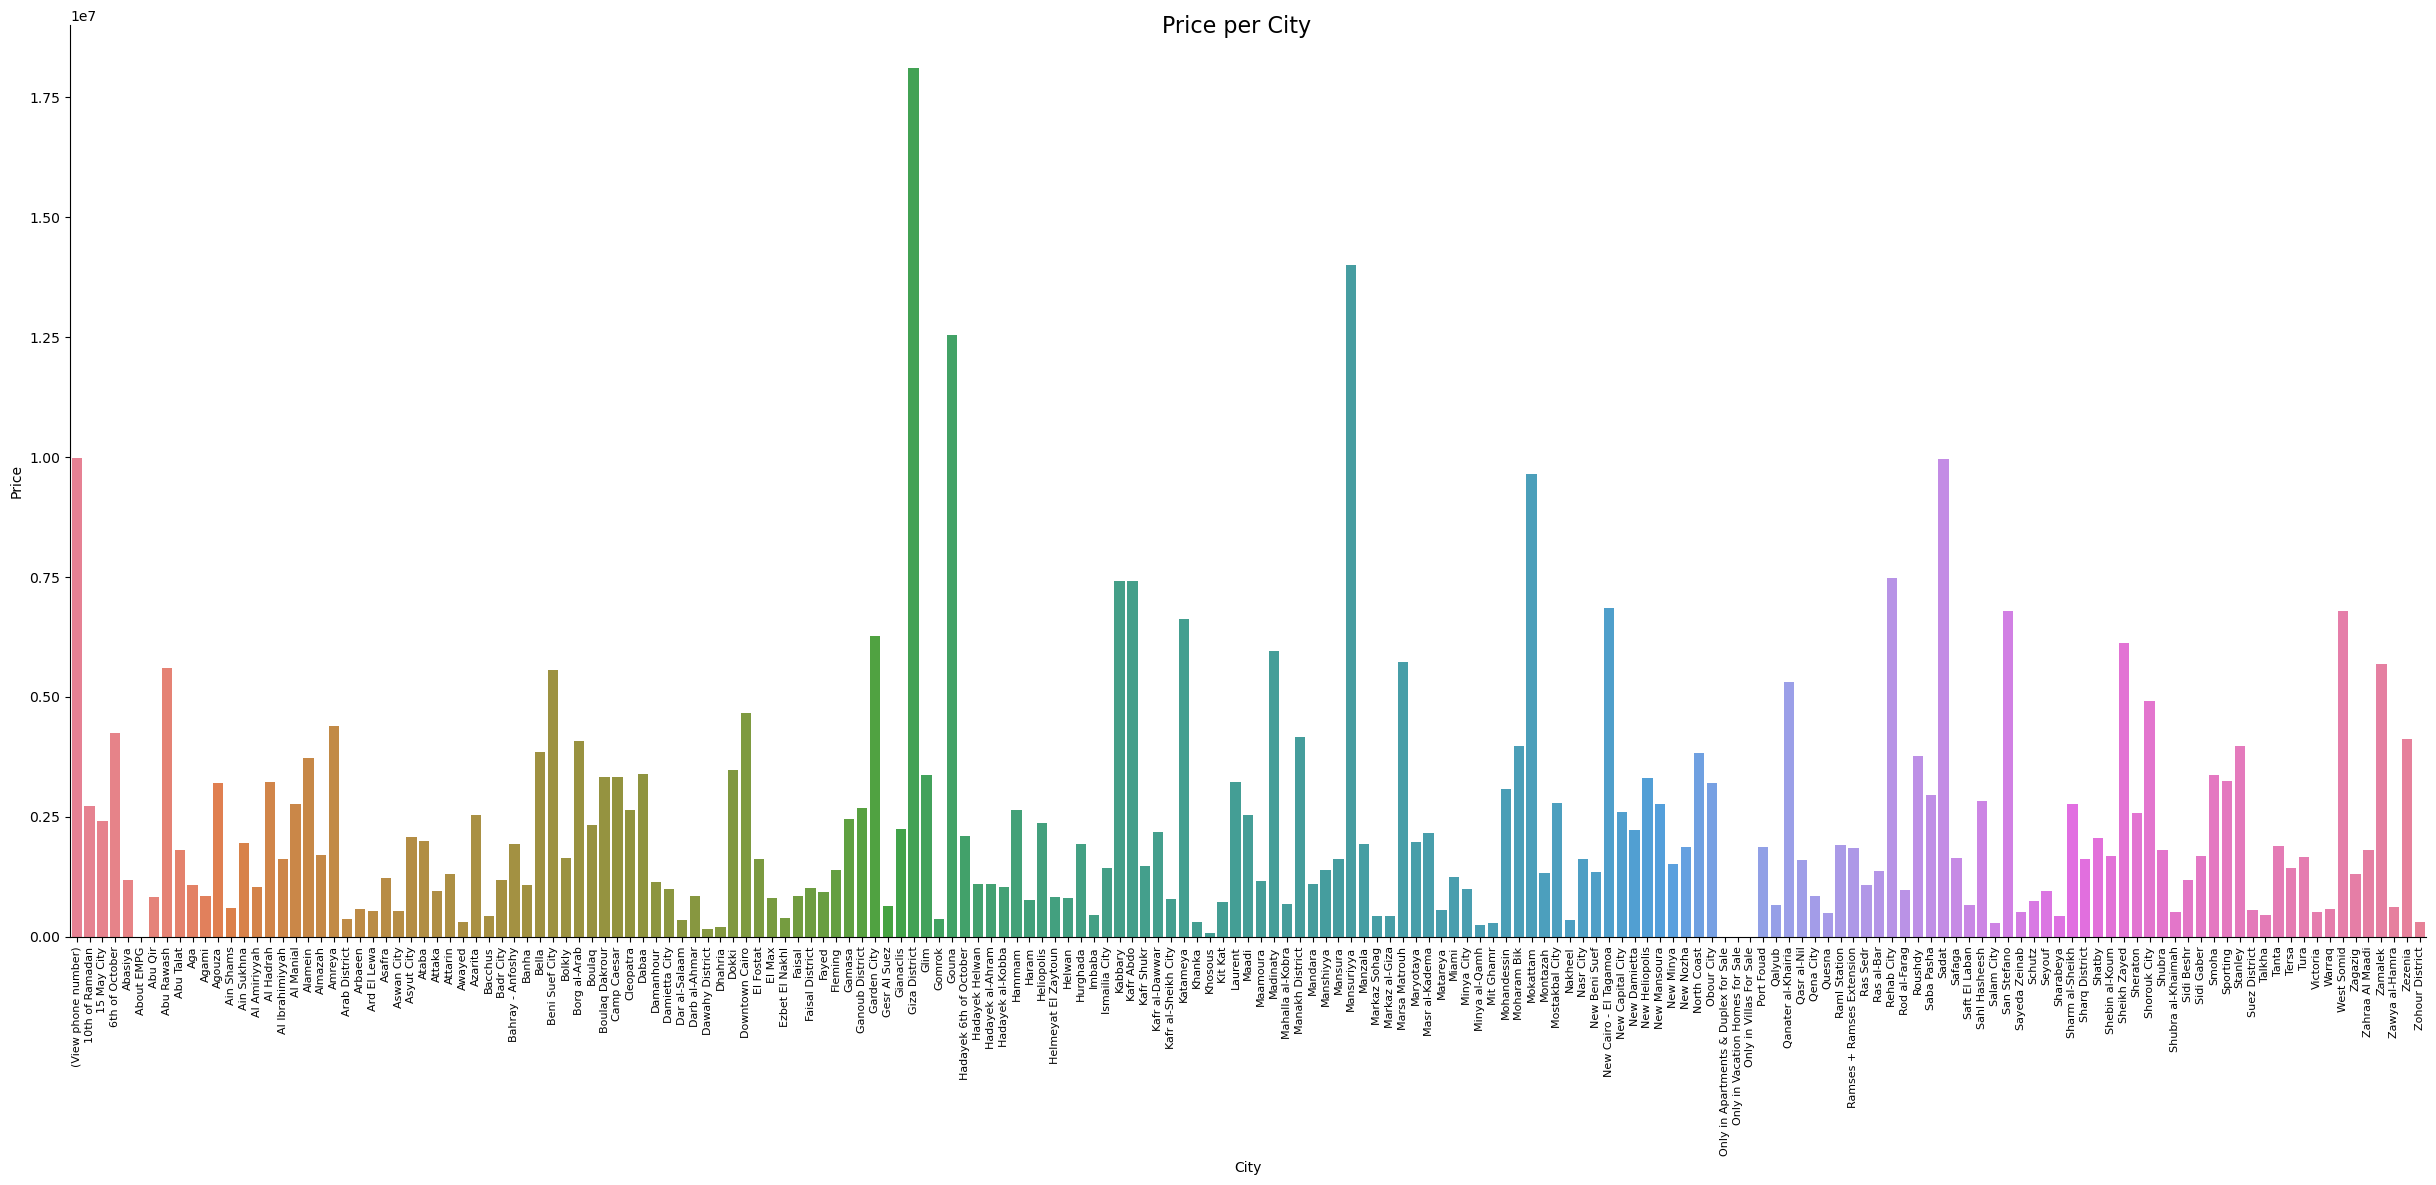

In [145]:
cp = sns.catplot(kind = 'bar', data=city_grouped, x='City', y='Price', hue='City', height=10, aspect=2.5)

cp.fig.suptitle("Price per City", fontsize=16)
cp.set_axis_labels("City", "Price")

cp.set_xticklabels(rotation=90, fontsize = 8)
plt.show()

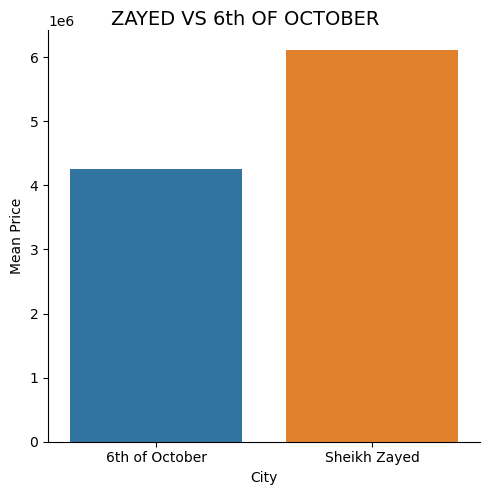

In [153]:
zayed_and_october = df[(df["City"]=="6th of October")  | (df["City"]=="Sheikh Zayed")]
zayed_vs_october = zayed_and_october.groupby("City")[['Price']].mean()
zo = sns.catplot(kind = 'bar', data = zayed_vs_october, x = 'City', y= 'Price', hue='City')
zo.fig.suptitle("ZAYED VS 6th OF OCTOBER", fontsize=14)
zo.set_axis_labels("City", "Mean Price")
plt.show()

In [147]:
df['Type'] = df['Type'].str.replace('Twin house', 'Twin House')

In [148]:
price_per_area = df.groupby("Type")[['Price']].mean()
price_per_area

,Price
Type,
Apartment,1.987701e+06
Chalet,2.312557e+06
Duplex,3.298000e+06
Penthouse,3.628321e+06
Stand Alone Villa,1.191005e+07
Studio,1.322359e+06
Town House,4.876389e+06
Twin House,6.812329e+06
Unknown,0.000000e+00


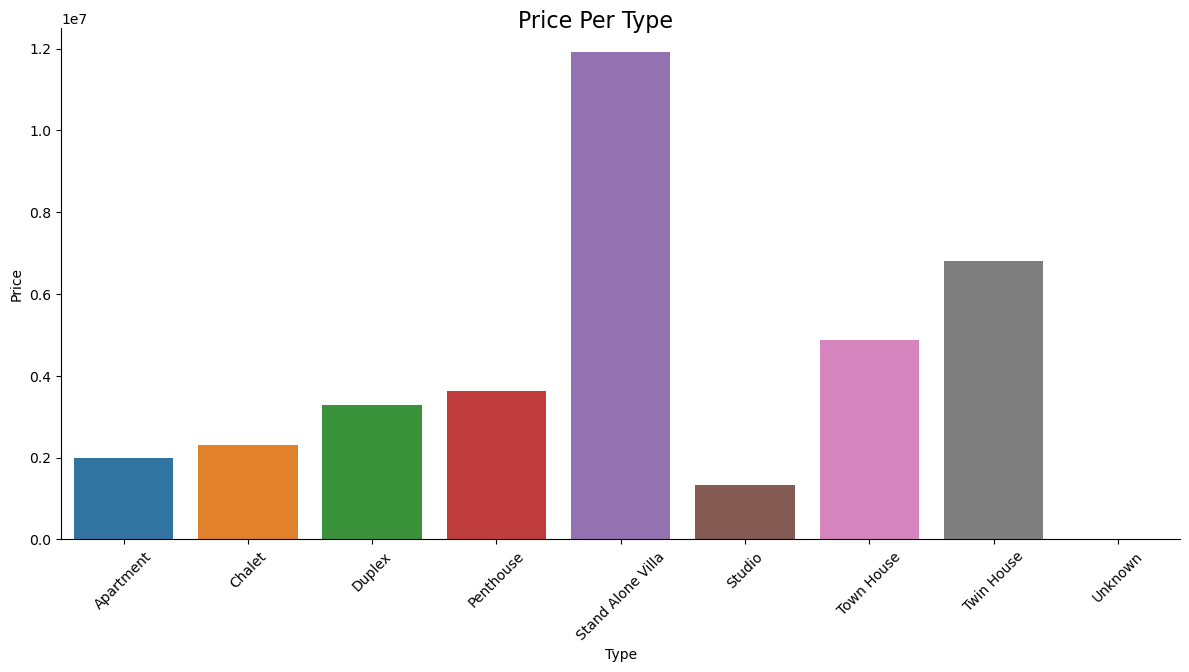

In [149]:
tp = sns.catplot(kind = 'bar', data=price_per_area, x = "Type", y = "Price", hue = "Type", height=6, aspect=2)
tp.fig.suptitle("Price Per Type", fontsize=16)
tp.set_axis_labels("Type", "Price")
tp.set_xticklabels(rotation=45)
plt.show()